<a href="https://colab.research.google.com/github/YunSeoHwan/DNN_Study/blob/main/CNN/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

Files already downloaded and verified
Files already downloaded and verified


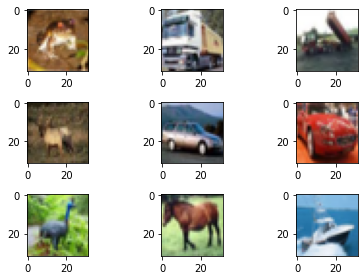

In [8]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# load dataset
training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor())

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
    
plt.tight_layout()
plt.show()

# **Data Augmentation**

Files already downloaded and verified
Files already downloaded and verified


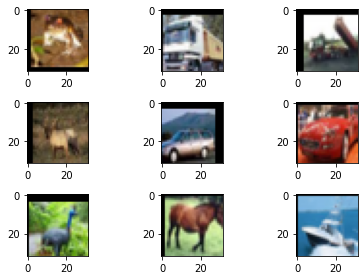

In [15]:
import torchvision.transforms as T

from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

# define data processing 
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),    # 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5)         # y축 기준 대칭
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor())

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))
    
plt.tight_layout()
plt.show()

# **Nomalizition**

Files already downloaded and verified
Files already downloaded and verified


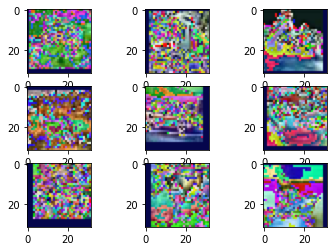

In [16]:
from torchvision.transforms import Normalize

# define data processing 
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),    
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),

    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
    T.ToPILImage()     
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor())

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))
plt.show()

# **Mean, Std**

In [21]:
import torch

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor())

# item[0] : img, item[1] : target
imgs = [item[0] for item in training_data]

# img를 합칩
imgs = torch.stack(imgs, dim=0).numpy()

# rgb 평균
mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()
print(mean_r, mean_g, mean_b)

# rgb 표준편차
std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 1, :, :].std()
std_b = imgs[:, 2, :, :].std()
print(std_r, std_g, std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768
